In [1]:
import sys
import os

import pandas as pd
import numpy as np
import pylab as pl
# from scipy import stats
from sklearn import mixture

import seaborn as sns

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import Stable.ConnectomeFunctions as cf

import Development.Neuprint as dv
import neuprint as neu

In [2]:
import plotting as putil
import utils as util
import neuprint_funcs as npf

In [3]:
figdir = '/Users/julianarhee/Documents/rutalab/projects/connectome/neuprint-playground'


In [24]:
plot_style = 'dark'
putil.set_sns_style(style=plot_style, min_fontsize=16)
bg_color = [0.7]*3 if plot_style=='dark' else 'k'

In [5]:
LC10_ids = util.manual_tab2csv()
# LC10_ids.columns = ['a', 'b', 'c', 'd']
LC10_ids = LC10_ids #.astype(int)
LC10_ids.head()

,LC10a,LC10b,LC10c,LC10d
0,1.110566e+09,1.111244e+09,1.111917e+09,1.111581e+09
1,1.110536e+09,1.111218e+09,1.110886e+09,1.110562e+09
2,1.110186e+09,1.136399e+09,1.140548e+09,1.110558e+09
3,1.110903e+09,1.136740e+09,1.142598e+09,1.110895e+09
4,1.110903e+09,1.141938e+09,1.167434e+09,1.110886e+09


In [6]:
# For each ID, get inputs (dendrite labels) and outputs (axon labels)
lc10a_cells = LC10_ids['LC10a'].dropna().astype(int)
lc10a = npf.get_axo_den_locs_for_cell_ids(lc10a_cells)
lc10a.groupby('type')['cell'].count()

type
axon        59
dendrite    59
Name: cell, dtype: int64

In [ ]:
# conn_mat = cf.con_matrix_iputs('LC10')

In [7]:
# from neuprint import NeuronCriteria as NC

In [7]:
# Example: Fetch all downstream connections FROM a set of neurons
# criteria = NC(bodyId=lc10a_cells)
neuron_df, conn_df = neu.fetch_adjacencies(list(lc10a_cells), None)

In [8]:
# Merge arbitrary neuron properties onto the connection table with merge_neuron_properties()
conn_df = neu.merge_neuron_properties(neuron_df, conn_df, ['type', 'instance'])
conn_df.head()

,bodyId_pre,bodyId_post,roi,weight,type_pre,instance_pre,type_post,instance_post
0,861574640,642720054,AOTU(R),1,LC10,LC10,AOTU035,AOTU035_R
1,861574640,673763861,AOTU(R),5,LC10,LC10,AOTU016,AOTU016_R
2,861574640,675166212,AOTU(R),1,LC10,LC10,PAL03,PAL03(ADL17)_L
3,861574640,708290604,AOTU(R),51,LC10,LC10,TuTuA,TuTuA_R
4,861574640,737824168,AOTU(R),1,LC10,LC10,AOTU028,AOTU028_R


In [9]:
import importlib

In [10]:
importlib.reload(npf)

<module 'neuprint_funcs' from '/Users/julianarhee/Repositories/connectome-analysis/neuprint_funcs.py'>

<Axes: xlabel='bodyId_post', ylabel='bodyId_pre'>

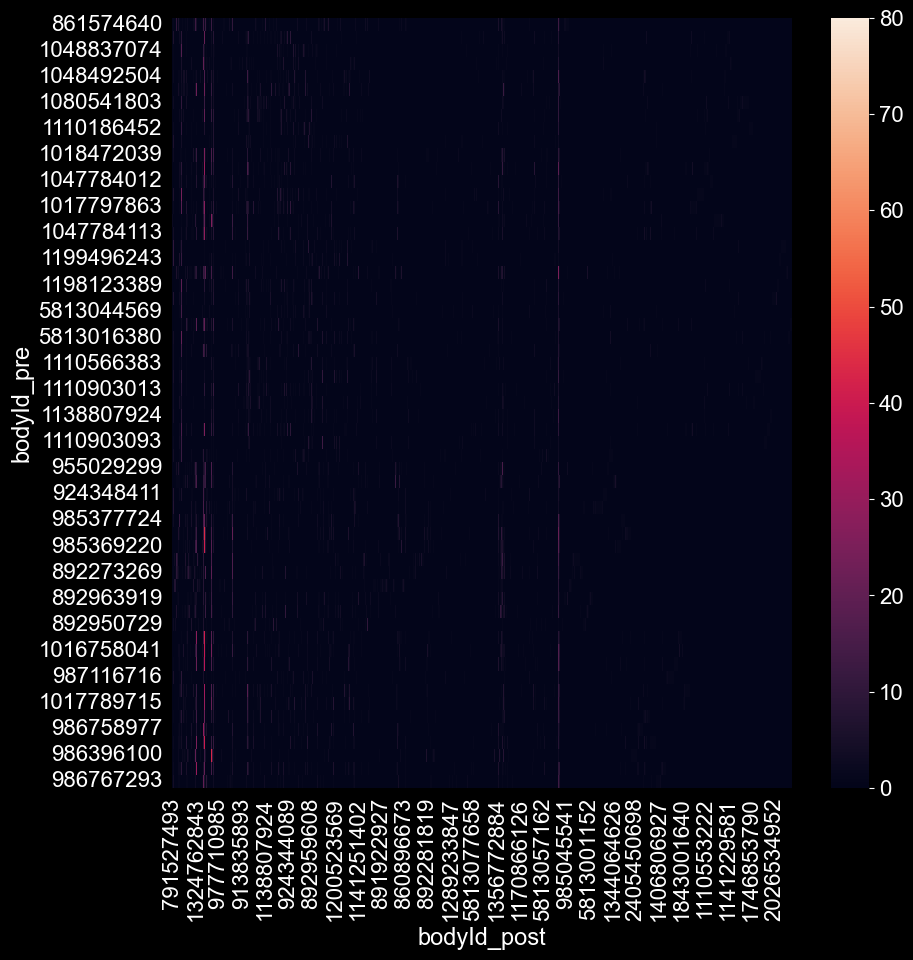

In [38]:
# Convert a connection table into a connectivity matrix
matrix = npf.connection_table_to_matrix(conn_df, 'bodyId', sort_by='type')

matrix.index = matrix.index.astype(str)
matrix.columns = matrix.columns.astype(str)
fig, ax = pl.subplots(figsize=(10,10))
sns.heatmap(matrix)
#matrix.hvplot.heatmap(height=600, width=700, xaxis='top').opts(xrotation=60)

In [52]:
conn_df.head()

,bodyId_pre,bodyId_post,roi,weight,type_pre,instance_pre,type_post,instance_post
0,861574640,642720054,AOTU(R),1,LC10,LC10,AOTU035,AOTU035_R
1,861574640,673763861,AOTU(R),5,LC10,LC10,AOTU016,AOTU016_R
2,861574640,675166212,AOTU(R),1,LC10,LC10,PAL03,PAL03(ADL17)_L
3,861574640,708290604,AOTU(R),51,LC10,LC10,TuTuA,TuTuA_R
4,861574640,737824168,AOTU(R),1,LC10,LC10,AOTU028,AOTU028_R


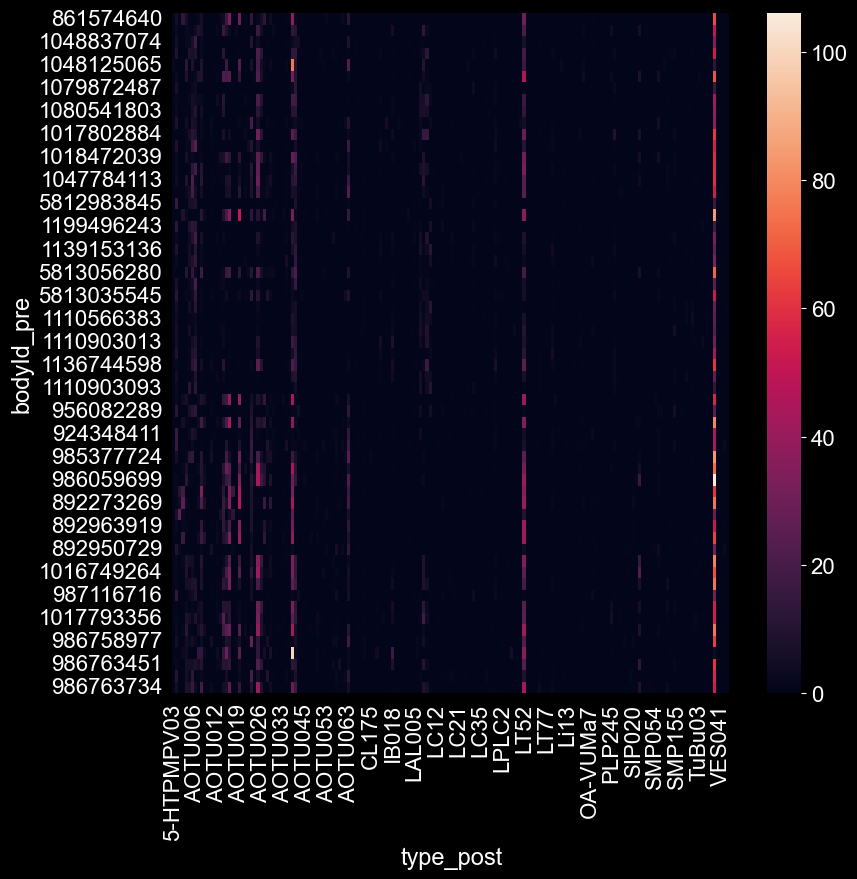

In [54]:
matrix = npf.connection_table_to_matrix(conn_df[conn_df['type_post']!='LC10'], 
                                        ('bodyId_pre', 'type_post'), sort_by='type')

matrix.index = matrix.index.astype(str)
matrix.columns = matrix.columns.astype(str)
#matrix.hvplot.heatmap(height=600, width=400)
fig, ax = pl.subplots(figsize=(10,10))
sns.heatmap(matrix)
# pl.imshow
pl.subplots_adjust(left=0.2, right=0.9, bottom=0.2)
figname = 'LC10a_bodyIdpre_typepost_connection_matrix'
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

In [61]:
matrix

type_post,5-HTPMPV03,AOTU001,AOTU002_a,AOTU002_b,AOTU003,AOTU004,AOTU005,AOTU006,AOTU007,AOTU008_a,...,TuBu06,TuBu07,TuBu08,TuBu09,TuTuA,TuTuB_a,VES041,aIPg1,mALC2,None
bodyId_pre,,,,,,,,,,,,,,,,,,,,,
861574640,0.0,5.0,0.0,13.0,6.0,1.0,0.0,0.0,2.0,6.0,...,0.0,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,NaN
1048492504,0.0,3.0,0.0,0.0,3.0,2.0,1.0,4.0,8.0,7.0,...,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,NaN
1048837074,0.0,5.0,0.0,0.0,3.0,3.0,7.0,17.0,0.0,3.0,...,0.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,NaN
1049169888,0.0,9.0,0.0,0.0,0.0,8.0,7.0,9.0,0.0,3.0,...,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,NaN
1048125065,2.0,0.0,0.0,0.0,12.0,0.0,8.0,1.0,0.0,9.0,...,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,NaN
1048125254,0.0,3.0,0.0,0.0,8.0,1.0,1.0,3.0,8.0,9.0,...,0.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,NaN
1079872487,0.0,7.0,0.0,0.0,0.0,1.0,3.0,4.0,0.0,0.0,...,1.0,0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,NaN
1080200419,0.0,2.0,0.0,0.0,0.0,2.0,6.0,4.0,3.0,3.0,...,0.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,NaN
1080541803,0.0,3.0,0.0,0.0,1.0,0.0,5.0,10.0,0.0,5.0,...,0.0,0.0,0.0,0.0,39.0,1.0,0.0,0.0,0.0,NaN


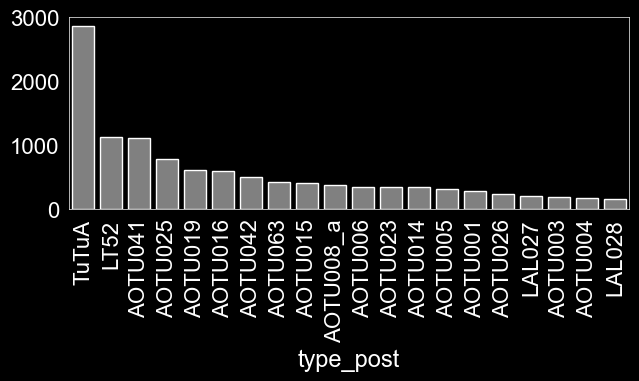

In [57]:
sum_lc10a_post = matrix.sum(axis=0).sort_values(ascending=False).iloc[0:20]
fig, ax = pl.subplots(figsize=(8,4))
sns.barplot(sum_lc10a_post, ax=ax, color='gray')
pl.xticks(rotation=90)
pl.subplots_adjust(left=0.2, right=0.9, bottom=0.4)

figname = 'LC10a_bodyIdpre_typepost_sorted_bar'
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

In [41]:
figdir

'/Users/julianarhee/Documents/rutalab/projects/connectome/neuprint-playground'

In [14]:
conn_df

,bodyId_pre,bodyId_post,roi,weight,type_pre,instance_pre,type_post,instance_post
0,861574640,642720054,AOTU(R),1,LC10,LC10,AOTU035,AOTU035_R
1,861574640,673763861,AOTU(R),5,LC10,LC10,AOTU016,AOTU016_R
2,861574640,675166212,AOTU(R),1,LC10,LC10,PAL03,PAL03(ADL17)_L
3,861574640,708290604,AOTU(R),51,LC10,LC10,TuTuA,TuTuA_R
4,861574640,737824168,AOTU(R),1,LC10,LC10,AOTU028,AOTU028_R
...,...,...,...,...,...,...,...,...
5964,5813056280,5813048880,AOTU(R),1,LC10,LC10,LC10,LC10
5965,5813056280,5813057774,AOTU(R),12,LC10,LC10,AOTU042,AOTU042(AVM16)_L
5966,5813056280,5813078621,AOTU(R),1,LC10,LC10,AOTU035,AOTU035(AVL23)_L
5967,5813056280,5813094683,AOTU(R),1,LC10,LC10,AOTU013,AOTU013_R


In [32]:
post_aotu = sorted(np.unique([c for c in conn_df['type_post'] if c is not None and 'AOTU' in c]))
# post_aotu

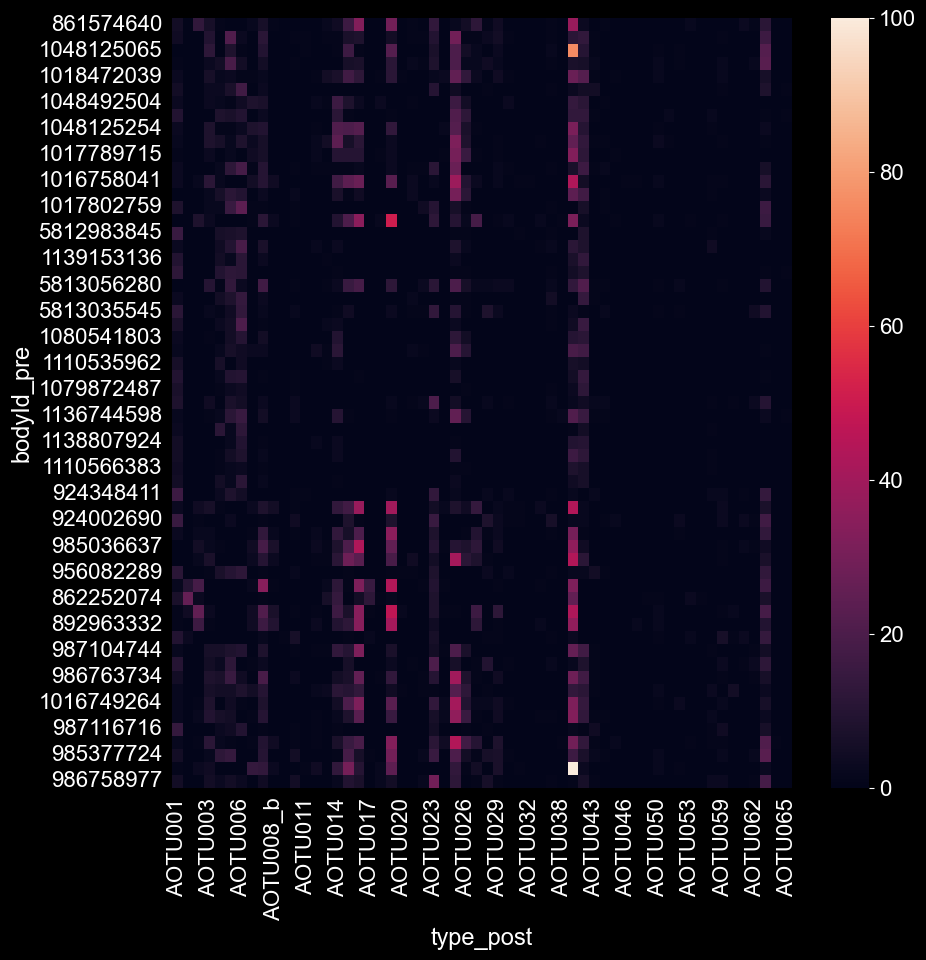

In [33]:
matrix = npf.connection_table_to_matrix(conn_df[conn_df['type_post'].isin(post_aotu)], 
                                        group_cols=('bodyId_pre', 'type_post'), sort_by='type')

matrix.index = matrix.index.astype(str)
matrix.columns = matrix.columns.astype(str)
#matrix.hvplot.heatmap(height=600, width=400)
fig, ax = pl.subplots(figsize=(10,10))
sns.heatmap(matrix)
# pl.imshow

figname = 'LC10a_bodyIdpre_typepost-AOTU_connection_matrix'
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
           

In [34]:
cellids_str = lc10a_cells.astype(str)


<Axes: xlabel='type_post', ylabel='bodyId_pre'>

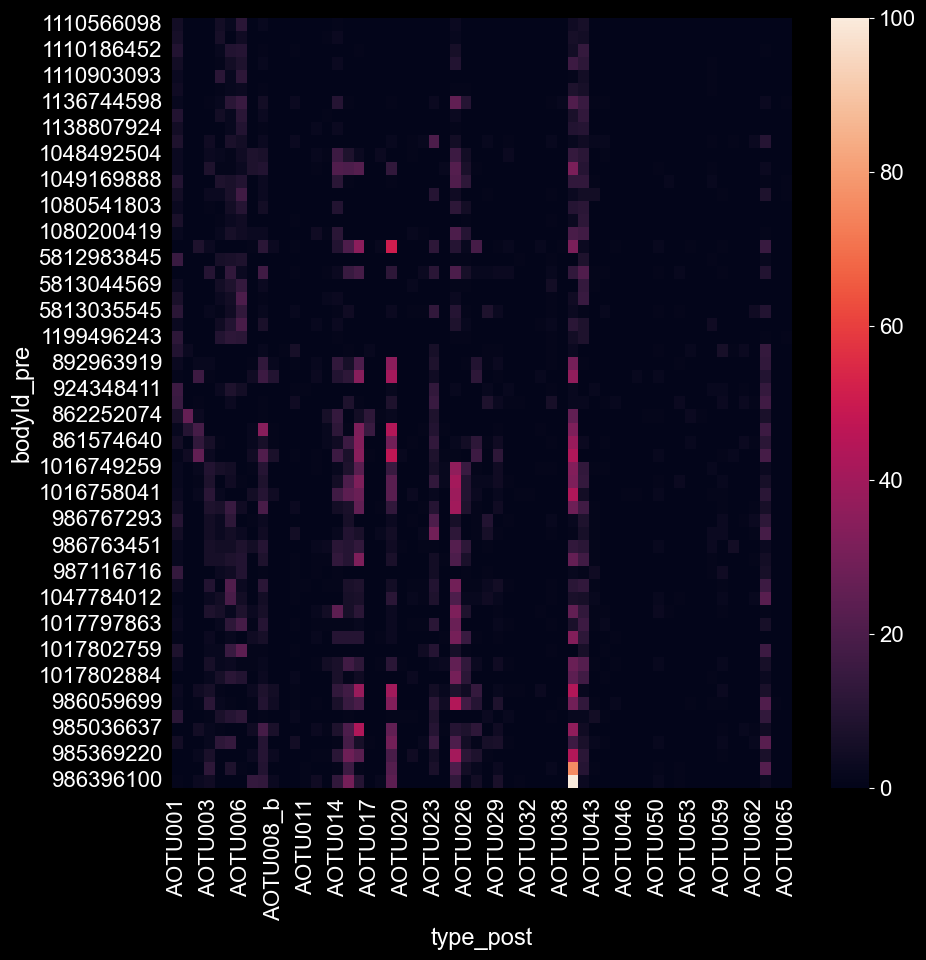

In [35]:
fig, ax = pl.subplots(figsize=(10,10))
sns.heatmap(matrix.loc[cellids_str])



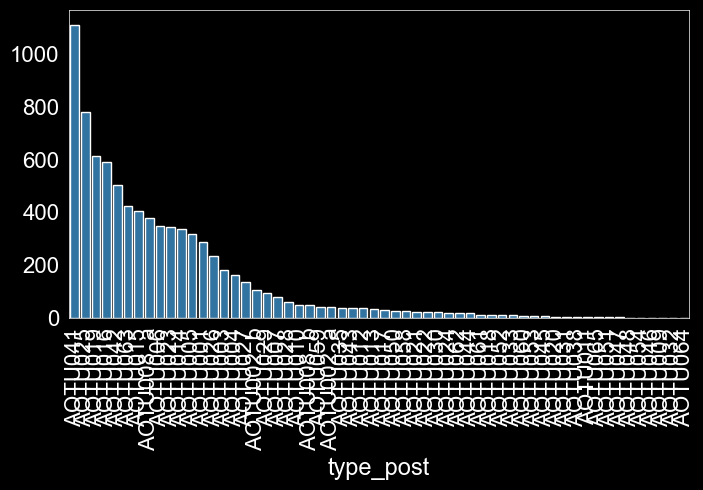

In [37]:
sum_lc10a_post = matrix.sum().sort_values(ascending=False)
fig, ax = pl.subplots(figsize=(8,4))
sns.barplot(sum_lc10a_post, ax=ax)
pl.xticks(rotation=90)


figname = 'LC10a-AOTU_bodyIdpre_typepost_sorted_bar'
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

In [78]:
from matplotlib_venn import venn3, venn3_circles, venn2

In [92]:
aotu41_ids_post = conn_df[conn_df['type_post']=='AOTU041']['bodyId_post'].unique()
aotu19_ids_post = conn_df[conn_df['type_post']=='AOTU019']['bodyId_post'].unique()
aotu25_ids_post = conn_df[conn_df['type_post']=='AOTU025']['bodyId_post'].unique()


In [93]:
aotu19_ids_pre = set(conn_df[conn_df['type_post']=='AOTU019']['bodyId_pre'].values)
aotu25_ids_pre = set(conn_df[conn_df['type_post']=='AOTU025']['bodyId_pre'].values)
aotu41_ids_pre = set(conn_df[conn_df['type_post']=='AOTU041']['bodyId_pre'].values)

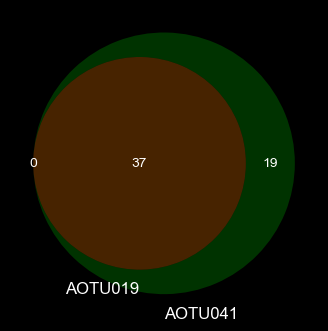

In [94]:
venn2([aotu19_ids_pre, aotu41_ids_pre], ('AOTU019', 'AOTU041'))

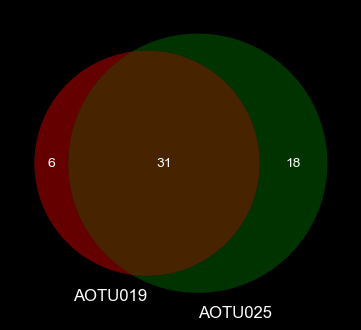

In [95]:
venn2([aotu19_pre, aotu25_pre], ('AOTU019', 'AOTU025'))

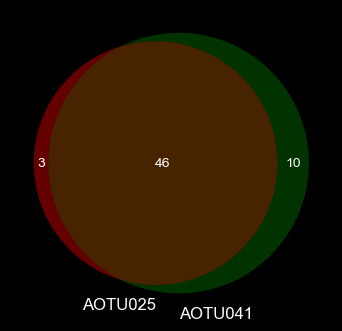

In [96]:
venn2([aotu25_pre, aotu41_pre], ('AOTU025', 'AOTU041'))

/Users/julianarhee/miniforge3/envs/neuprint/lib/python3.11/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


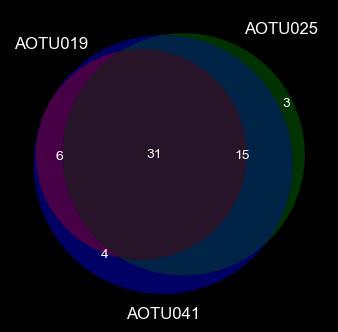

In [76]:
venn3([aotu19_pre, aotu25_pre, aotu41_pre],
      ('AOTU019', 'AOTU025', 'AOTU041'))

In [56]:
conn_df

,bodyId_pre,bodyId_post,roi,weight,type_pre,instance_pre,type_post,instance_post
0,861574640,642720054,AOTU(R),1,LC10,LC10,AOTU035,AOTU035_R
1,861574640,673763861,AOTU(R),5,LC10,LC10,AOTU016,AOTU016_R
2,861574640,675166212,AOTU(R),1,LC10,LC10,PAL03,PAL03(ADL17)_L
3,861574640,708290604,AOTU(R),51,LC10,LC10,TuTuA,TuTuA_R
4,861574640,737824168,AOTU(R),1,LC10,LC10,AOTU028,AOTU028_R
...,...,...,...,...,...,...,...,...
5964,5813056280,5813048880,AOTU(R),1,LC10,LC10,LC10,LC10
5965,5813056280,5813057774,AOTU(R),12,LC10,LC10,AOTU042,AOTU042(AVM16)_L
5966,5813056280,5813078621,AOTU(R),1,LC10,LC10,AOTU035,AOTU035(AVL23)_L
5967,5813056280,5813094683,AOTU(R),1,LC10,LC10,AOTU013,AOTU013_R


In [21]:
sortvar = 'y'
sorted_ = lc10a[lc10a['type']=='dendrite'].sort_values(by=sortvar).copy()
# get cell ids 
cellids = sorted_['cell'] #[0::2]

In [23]:
cellids[0::10]

9      1110903093
27     1048837074
25     1049169888
75      986763734
111     985377724
103     955029299
Name: cell, dtype: int64

In [33]:
cellids[0::8]

9      1110903093
47     1198123389
7      1110903013
33     1080200419
83      987104744
111     985377724
23     1048125254
63      862265699
Name: cell, dtype: int64

In [26]:
curr_cells = cellids[0::6]

In [28]:
pal = sns.color_palette('viridis', n_colors=len(curr_cells))
pal.as_hex()

['#482173',
 '#433e85',
 '#38588c',
 '#2d708e',
 '#25858e',
 '#1e9b8a',
 '#2ab07f',
 '#52c569',
 '#86d549',
 '#c2df23']

In [30]:
hex = pal.as_hex()

In [32]:
print(hex)

['#482173', '#433e85', '#38588c', '#2d708e', '#25858e', '#1e9b8a', '#2ab07f', '#52c569', '#86d549', '#c2df23']


In [ ]:
aotu25 = 892294329
aotu19 = 799868224